In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [117]:
df = pd.read_csv('/Users/viswaksenajayam/Downloads/4thsem/MachineLearning/churn_dataset.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [118]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [119]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [120]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

# Accuracy and Dummy model

In [122]:
len(y_pred)

1409

In [123]:
(y_val == churn_decision).sum()

1132

In [124]:
1132/1409

0.8034066713981547

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
accuracy_score(y_val,y_pred >= 0.5)

0.8034066713981547

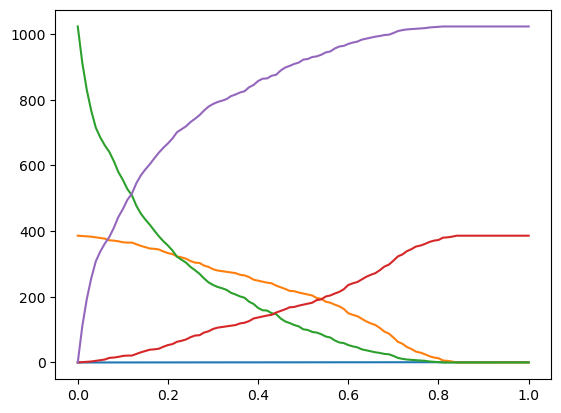

In [127]:
plt.plot(thresholds,scores)

In [128]:
from collections import Counter

In [129]:
Counter(y_pred >= 1)

Counter({False: 1409})

In [130]:
1 - y_val.mean() #not churning

0.7260468417317246

# Confusion Table 

In [131]:
acutal_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [132]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [133]:
tp = (predict_positive & acutal_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [134]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & acutal_positive).sum()

In [135]:
 confusion_matrix = np.array([
     [tn, fp],
     [fn, tp]
 ])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [136]:
confusion_matrix / confusion_matrix.sum()

array([[0.6543648 , 0.07168204],
       [0.12491128, 0.14904187]])

# Precision and Recall

In [137]:
(tp+tn)/ (tp+tn+fp+fn)

0.8034066713981547

In [138]:
p = tp/ (tp+fp)
p

0.6752411575562701

In [139]:
r = tp/ (tp+fn)
r

0.5440414507772021

# ROC Curves(receiver operating charecteristics)

In [140]:
tpr = tp/ (tp+fn)
tpr

0.5440414507772021

In [141]:
fpr = fp/ (fp+tn)
fpr

0.09872922776148582

In [142]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    acutal_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & acutal_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & acutal_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [143]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores,columns = columns)

In [144]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [145]:
df_scores['tpr'] = df_scores.tp/ (df_scores.tp+df_scores.fn)
df_scores['fpr'] = df_scores.fp/ (df_scores.fp+df_scores.tn)

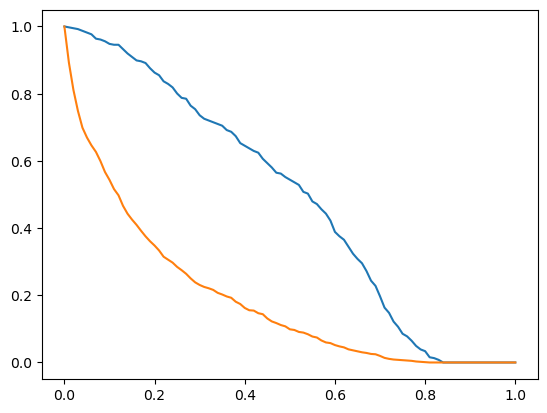

In [146]:
plt.plot(df_scores.threshold,df_scores['tpr'],label = "TPR")
plt.plot(df_scores.threshold,df_scores['fpr'],label = "FPR")

# Random Model

In [147]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))

In [148]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [149]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        acutal_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & acutal_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & acutal_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores,columns = columns)
    
    df_scores['tpr'] = df_scores.tp/ (df_scores.tp+df_scores.fn)
    df_scores['fpr'] = df_scores.fp/ (df_scores.fp+df_scores.tn)
    
    return df_scores

In [150]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [151]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


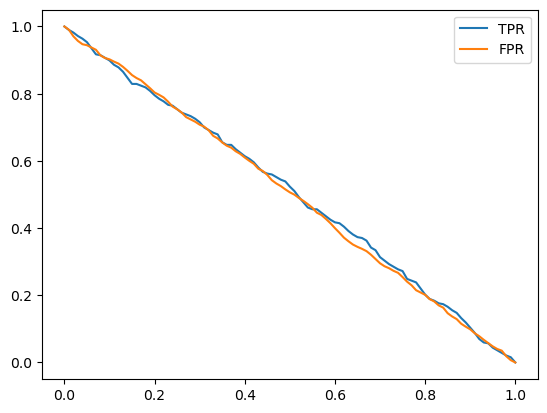

In [160]:
plt.plot(df_scores.threshold,df_rand['tpr'],label = "TPR")
plt.plot(df_scores.threshold,df_rand['fpr'],label = "FPR")
plt.legend()

# Idea Model

In [153]:
num_neg = (y_val == 0).sum()
num_pos= (y_val == 1).sum()
num_neg,num_pos

(1023, 386)

In [154]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [155]:
y_ideal_pred = np.linspace(0,1,len(y_ideal))

In [156]:
1 - y_val.mean()

0.7260468417317246

In [157]:
((y_ideal_pred >= 0.7260468417317246) == y_ideal).mean()

1.0

In [158]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [159]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


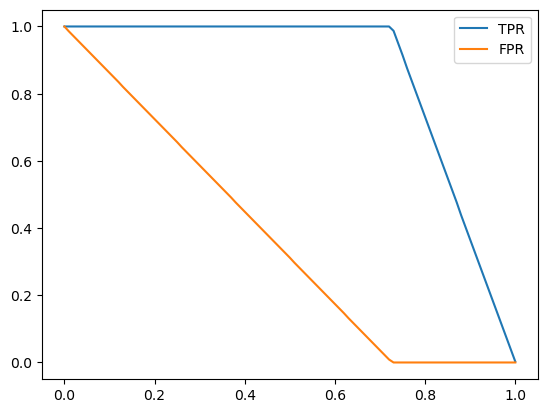

In [161]:
plt.plot(df_ideal.threshold,df_ideal['tpr'],label = "TPR")
plt.plot(df_ideal.threshold,df_ideal['fpr'],label = "FPR")
plt.legend()

# Putting everything together

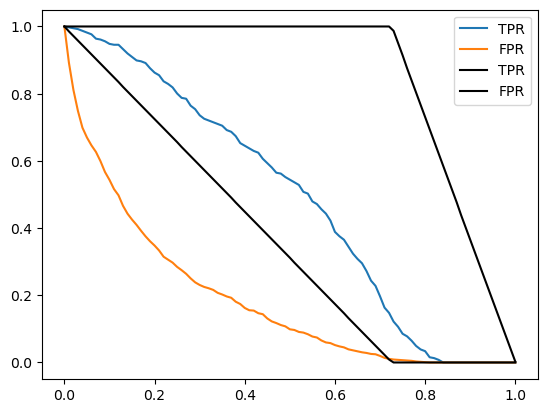

In [163]:
plt.plot(df_scores.threshold,df_scores['tpr'],label = "TPR")
plt.plot(df_scores.threshold,df_scores['fpr'],label = "FPR")

# plt.plot(df_scores.threshold,df_rand['tpr'],label = "TPR")
# plt.plot(df_scores.threshold,df_rand['fpr'],label = "FPR")

plt.plot(df_ideal.threshold,df_ideal['tpr'],label = "TPR", color = 'black')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label = "FPR", color = 'black')

plt.legend()

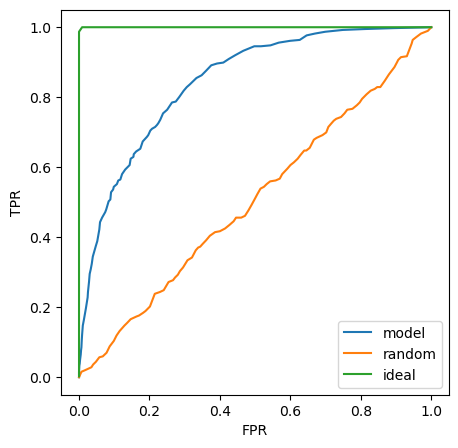

In [169]:
plt.figure(figsize= (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = "model")
plt.plot(df_rand.fpr, df_rand.tpr, label = "random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label = "ideal")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

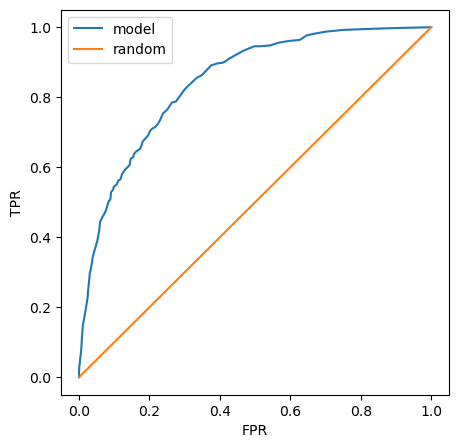

In [170]:
plt.figure(figsize= (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = "model")
plt.plot([0,1],[0,1], label = "random")
# plt.plot(df_ideal.fpr, df_ideal.tpr, label = "ideal")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()